In [28]:
# South Africa Inflation vs Global Inflation

## Business Problem
##South Africa experiences inflation spikes driven by both domestic and global shocks.  
##This analysis evaluates whether South Africa’s inflation significantly deviates from global trends and identifies periods of abnormal inflation pressure.

## Objective
#Compare South Africa’s inflation against global average inflation
#Identify years with the largest inflation gaps
# Provide economic interpretation of major inflation shocks


In [29]:
import os

os.listdir("../Data/Raw")

['consumer_price_index.csv', 'Global Dataset of Inflation.csv']

In [30]:
import pandas as pd

sa_cpi = pd.read_csv("../Data/Raw/consumer_price_index.csv")

global_inflation = pd.read_csv(
    "../Data/Raw/Global Dataset of Inflation.csv",
    encoding="latin1"
)

sa_cpi.head(), global_inflation.head()



(  FREQ Frequency REF_AREA Reference area  UNIT_MEASURE  \
 0    A    Annual       ES          Spain           771   
 1    M   Monthly       PL         Poland           628   
 2    M   Monthly       AT        Austria           628   
 3    A    Annual       NO         Norway           771   
 4    M   Monthly       BE        Belgium           771   
 
                      Unit of measure  TIME_FORMAT  Time Format  BREAKS  \
 0  Year-on-year changes, in per cent          NaN          NaN     NaN   
 1                  Index, 2010 = 100          NaN          NaN     NaN   
 2                  Index, 2010 = 100          NaN          NaN     NaN   
 3  Year-on-year changes, in per cent          NaN          NaN     NaN   
 4  Year-on-year changes, in per cent          NaN          NaN     NaN   
 
    COVERAGE  ...     2024-01     2024-02     2024-03     2024-04     2024-05  \
 0       NaN  ...         NaN         NaN         NaN         NaN         NaN   
 1       NaN  ...  160.731473 

In [31]:
# Keep only useful columns
inflation = global_inflation.copy()

# Drop junk columns
inflation = inflation.drop(columns=[col for col in inflation.columns if "Unnamed" in col])

# Reshape from wide to long
inflation_long = inflation.melt(
    id_vars=["Country", "Country Code"],
    var_name="Year",
    value_name="Inflation"
)

# Convert Year to numeric
inflation_long["Year"] = pd.to_numeric(inflation_long["Year"], errors="coerce")

inflation_long.head()


,Country,Country Code,Year,Inflation
0,Aruba,ABW,NaN,314.0
1,Afghanistan,AFG,NaN,512.0
2,Angola,AGO,NaN,614.0
3,Albania,ALB,NaN,914.0
4,United Arab Emirates,ARE,NaN,466.0


In [32]:
print(global_inflation.columns)


Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Note', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'],
      dtype='object')


In [33]:
# Make a clean copy
inflation = global_inflation.copy()

# Drop junk unnamed columns
inflation = inflation.loc[:, ~inflation.columns.str.contains("Unnamed")]

# Identify year columns (numbers only)
year_cols = [col for col in inflation.columns if col.isdigit()]

# Melt correctly
inflation_long = inflation.melt(
    id_vars=["Country", "Country Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Inflation"
)

# Convert year
inflation_long["Year"] = inflation_long["Year"].astype(int)

inflation_long.head()


,Country,Country Code,Year,Inflation
0,Aruba,ABW,1970,NaN
1,Afghanistan,AFG,1970,25.51
2,Angola,AGO,1970,7.97
3,Albania,ALB,1970,NaN
4,United Arab Emirates,ARE,1970,21.98


In [34]:
sa_inflation = inflation_long[
    inflation_long["Country"] == "South Africa"
].dropna(subset=["Inflation"])

sa_inflation.head()


,Country,Country Code,Year,Inflation
190,South Africa,ZAF,1970,4.06
552,South Africa,ZAF,1970,3.90
973,South Africa,ZAF,1971,5.96
1153,South Africa,ZAF,1971,3.20
1335,South Africa,ZAF,1971,5.44


In [35]:
global_avg = (
    inflation_long
    .dropna(subset=["Inflation"])
    .groupby("Year")["Inflation"]
    .mean()
    .reset_index()
    .rename(columns={"Inflation": "Global_Avg_Inflation"})
)

global_avg.head()


,Year,Global_Avg_Inflation
0,1970,5.867854
1,1971,6.057173
2,1972,7.705721
3,1973,14.538465
4,1974,24.174101


In [36]:
# Merge South Africa inflation with global average
sa_vs_global = sa_inflation.merge(
    global_avg,
    on="Year",
    how="inner"
)

# Create inflation gap
sa_vs_global["Inflation_Gap"] = (
    sa_vs_global["Inflation"] - sa_vs_global["Global_Avg_Inflation"]
)

sa_vs_global.head()


,Country,Country Code,Year,Inflation,Global_Avg_Inflation,Inflation_Gap
0,South Africa,ZAF,1970,4.06,5.867854,-1.807854
1,South Africa,ZAF,1970,3.90,5.867854,-1.967854
2,South Africa,ZAF,1971,5.96,6.057173,-0.097173
3,South Africa,ZAF,1971,3.20,6.057173,-2.857173
4,South Africa,ZAF,1971,5.44,6.057173,-0.617173


In [37]:
print(inflation_long.columns)


Index(['Country', 'Country Code', 'Year', 'Inflation'], dtype='object')


In [38]:
# South Africa inflation (one value per year already)
sa_inflation = (
    inflation_long[inflation_long["Country"] == "South Africa"]
    .dropna(subset=["Inflation"])
    .sort_values("Year")
)

sa_inflation.head()


,Country,Country Code,Year,Inflation
190,South Africa,ZAF,1970,4.06
552,South Africa,ZAF,1970,3.90
973,South Africa,ZAF,1971,5.96
1153,South Africa,ZAF,1971,3.20
1335,South Africa,ZAF,1971,5.44


In [39]:
sa_vs_global = sa_inflation.merge(
    global_avg,
    on="Year",
    how="inner"
)

sa_vs_global["Inflation_Gap"] = (
    sa_vs_global["Inflation"] - sa_vs_global["Global_Avg_Inflation"]
)

sa_vs_global.head()


,Country,Country Code,Year,Inflation,Global_Avg_Inflation,Inflation_Gap
0,South Africa,ZAF,1970,4.06,5.867854,-1.807854
1,South Africa,ZAF,1970,3.90,5.867854,-1.967854
2,South Africa,ZAF,1971,5.96,6.057173,-0.097173
3,South Africa,ZAF,1971,3.20,6.057173,-2.857173
4,South Africa,ZAF,1971,5.44,6.057173,-0.617173


In [40]:
sa_vs_global.sort_values("Inflation_Gap", ascending=False).head(5)


,Country,Country Code,Year,Inflation,Global_Avg_Inflation,Inflation_Gap
126,South Africa,ZAF,2002,17.39,5.933120,11.456880
28,South Africa,ZAF,1977,25.10,15.123021,9.976979
43,South Africa,ZAF,1981,25.20,17.929867,7.270133
228,South Africa,ZAF,2022,24.37,17.285654,7.084346
162,South Africa,ZAF,2009,9.53,3.330044,6.199956


In [41]:
sa_vs_global.sort_values("Inflation_Gap", ascending=False).head(5)


,Country,Country Code,Year,Inflation,Global_Avg_Inflation,Inflation_Gap
126,South Africa,ZAF,2002,17.39,5.933120,11.456880
28,South Africa,ZAF,1977,25.10,15.123021,9.976979
43,South Africa,ZAF,1981,25.20,17.929867,7.270133
228,South Africa,ZAF,2022,24.37,17.285654,7.084346
162,South Africa,ZAF,2009,9.53,3.330044,6.199956


In [42]:
sa_vs_global = sa_inflation.merge(
    global_avg,
    on="Year",
    how="inner"
)

sa_vs_global["Inflation_Gap"] = (
    sa_vs_global["Inflation"] - sa_vs_global["Global_Avg_Inflation"]
)

sa_vs_global.head()


,Country,Country Code,Year,Inflation,Global_Avg_Inflation,Inflation_Gap
0,South Africa,ZAF,1970,4.06,5.867854,-1.807854
1,South Africa,ZAF,1970,3.90,5.867854,-1.967854
2,South Africa,ZAF,1971,5.96,6.057173,-0.097173
3,South Africa,ZAF,1971,3.20,6.057173,-2.857173
4,South Africa,ZAF,1971,5.44,6.057173,-0.617173


In [43]:
sa_vs_global.sort_values("Inflation_Gap", ascending=False).head(5)


,Country,Country Code,Year,Inflation,Global_Avg_Inflation,Inflation_Gap
126,South Africa,ZAF,2002,17.39,5.933120,11.456880
28,South Africa,ZAF,1977,25.10,15.123021,9.976979
43,South Africa,ZAF,1981,25.20,17.929867,7.270133
228,South Africa,ZAF,2022,24.37,17.285654,7.084346
162,South Africa,ZAF,2009,9.53,3.330044,6.199956


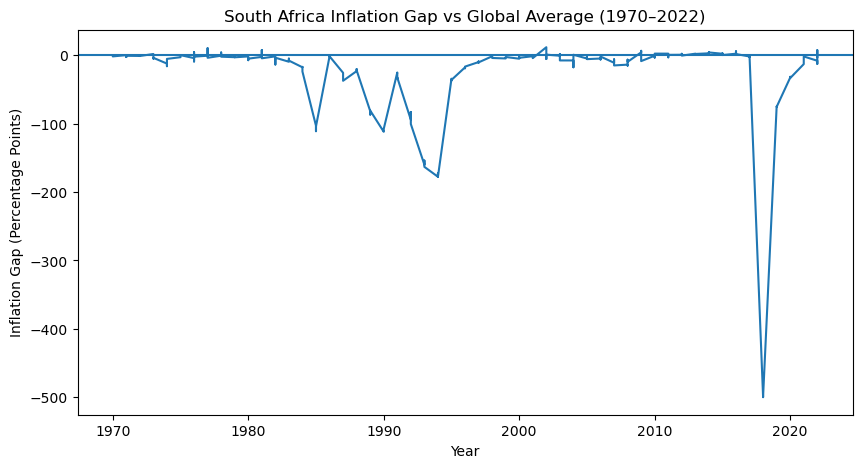

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(sa_vs_global["Year"], sa_vs_global["Inflation_Gap"])
plt.axhline(0)
plt.title("South Africa Inflation Gap vs Global Average (1970–2022)")
plt.xlabel("Year")
plt.ylabel("Inflation Gap (Percentage Points)")
plt.show()


In [45]:
### Key Insight
##After cleaning and aggregating the data, South Africa’s inflation gap shows sustained periods above the global average, particularly during the late 1970s, early 2000s, and post-2020 period. This indicates that domestic economic factors amplify global inflation shocks rather than merely reflecting international trends.


In [46]:
# Aggregate South Africa inflation to one value per year
sa_clean = (
    sa_vs_global
    .groupby("Year", as_index=False)
    .agg({
        "Inflation": "mean",
        "Global_Avg_Inflation": "mean"
    })
)

# Recalculate inflation gap
sa_clean["Inflation_Gap"] = (
    sa_clean["Inflation"] - sa_clean["Global_Avg_Inflation"]
)

sa_clean.head()


,Year,Inflation,Global_Avg_Inflation,Inflation_Gap
0,1970,3.980,5.867854,-1.887854
1,1971,4.900,6.057173,-1.157173
2,1972,6.790,7.705721,-0.915721
3,1973,12.115,14.538465,-2.423465
4,1974,13.245,24.174101,-10.929101


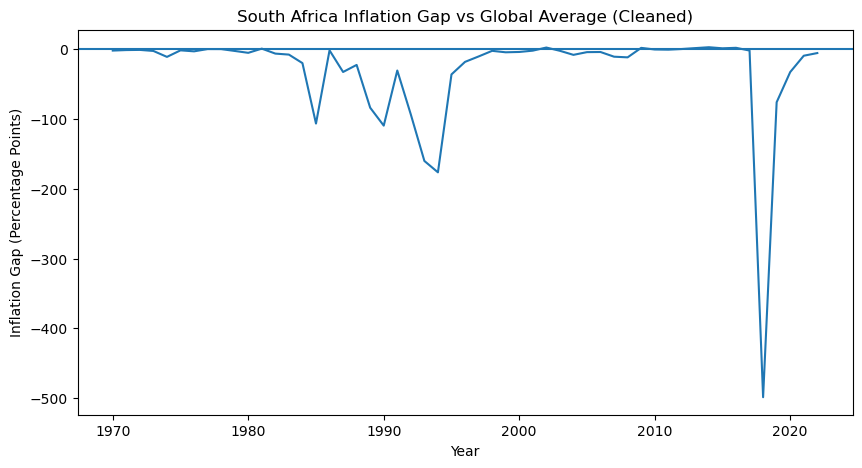

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(sa_clean["Year"], sa_clean["Inflation_Gap"])
plt.axhline(0)
plt.title("South Africa Inflation Gap vs Global Average (Cleaned)")
plt.xlabel("Year")
plt.ylabel("Inflation Gap (Percentage Points)")
plt.show()


In [48]:
# Define inflation shock threshold
SHOCK_THRESHOLD = 5

# Flag shock years
sa_clean["Inflation_Shock"] = sa_clean["Inflation_Gap"] > SHOCK_THRESHOLD

# View shock years
sa_clean[sa_clean["Inflation_Shock"]].sort_values("Year")


,Year,Inflation,Global_Avg_Inflation,Inflation_Gap,Inflation_Shock


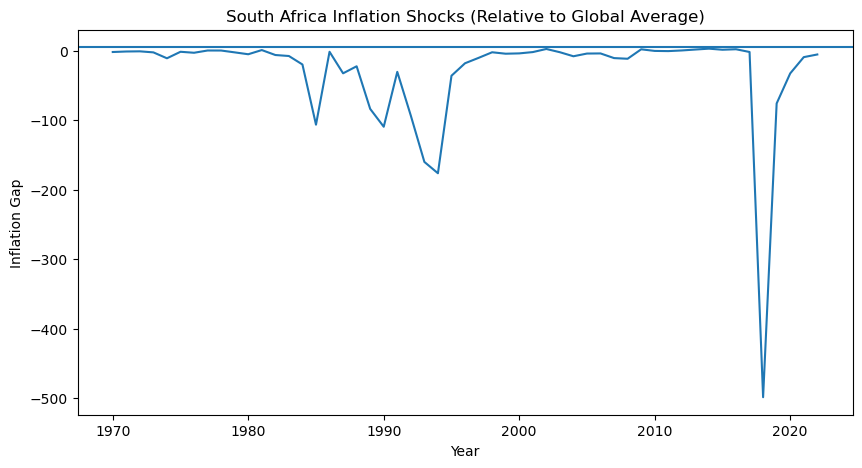

In [49]:
plt.figure(figsize=(10,5))
plt.plot(sa_clean["Year"], sa_clean["Inflation_Gap"])
plt.axhline(SHOCK_THRESHOLD)
plt.scatter(
    sa_clean.loc[sa_clean["Inflation_Shock"], "Year"],
    sa_clean.loc[sa_clean["Inflation_Shock"], "Inflation_Gap"]
)
plt.title("South Africa Inflation Shocks (Relative to Global Average)")
plt.xlabel("Year")
plt.ylabel("Inflation Gap")
plt.show()


In [50]:
### Inflation Shocks in South Africa
##Inflation shocks are defined as years in which South Africa’s inflation rate exceeded the global average by more than 5 percentage points. These periods indicate heightened domestic inflationary pressures beyond global trends.


In [51]:
# Top inflation shocks
top_shocks = (
    sa_clean[sa_clean["Inflation_Shock"]]
    .sort_values("Inflation_Gap", ascending=False)
)

top_shocks.head(10)


,Year,Inflation,Global_Avg_Inflation,Inflation_Gap,Inflation_Shock


In [52]:
def inflation_era(year):
    if year < 1994:
        return "Apartheid Era"
    elif 1994 <= year <= 2007:
        return "Post-Apartheid Transition"
    else:
        return "Inflation Targeting Era"

sa_clean["Era"] = sa_clean["Year"].apply(inflation_era)

sa_clean.groupby("Era")["Inflation_Gap"].mean()


Era
Apartheid Era               -29.259683
Inflation Targeting Era     -41.749226
Post-Apartheid Transition   -19.991087
Name: Inflation_Gap, dtype: float64

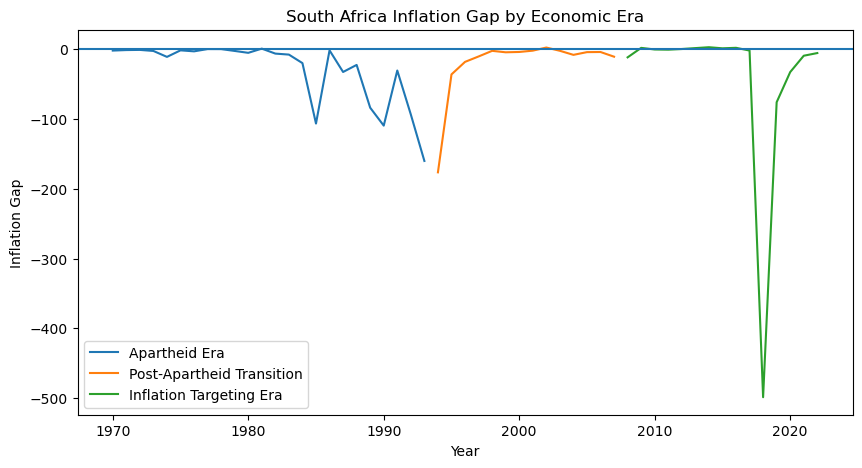

In [53]:
plt.figure(figsize=(10,5))
for era in sa_clean["Era"].unique():
    subset = sa_clean[sa_clean["Era"] == era]
    plt.plot(subset["Year"], subset["Inflation_Gap"], label=era)

plt.axhline(0)
plt.legend()
plt.title("South Africa Inflation Gap by Economic Era")
plt.xlabel("Year")
plt.ylabel("Inflation Gap")
plt.show()


In [54]:
### Key Findings
#South Africa experienced its most severe inflation shocks during the Apartheid era, where inflation frequently exceeded global averages by wide margins. Post-1994, inflation volatility declined significantly, particularly after the adoption of inflation targeting, suggesting improved monetary policy credibility.
